In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
df = pd.read_excel(r'C:\Users\jfrank\OneDrive - Specialized Bicycle Components\Hand_Glove_Pressure_Files\TC_Glove_Repeat.xlsx')

In [3]:
#Notes for test collector:
#File comments should follow the following naming convention:

#'GloveCondition HandPlacementCondition'
#For example BG Dual Gel gloves on the hoods would be:

# 'BGDualGel Hoods'

#The only space between words should be between the glovecondition and Hand placement condition

df.head()


N1                                  File name (pedar) File body  \
0   1  C:\novel\novfile\data\pedar\Carver_Todd\202109...   present   
1   1  C:\novel\novfile\data\pedar\Carver_Todd\202109...   present   
2   1  C:\novel\novfile\data\pedar\Carver_Todd\202109...   present   
3   1  C:\novel\novfile\data\pedar\Carver_Todd\202109...   present   
4   1  C:\novel\novfile\data\pedar\Carver_Todd\202109...   present   

     File short name Contact area (R) [cm²] Contact time (L) [ms]  \
0  Carver_Todd_3.sol           62.39 ± 0.00             0.0 ± 0.0   
1  Carver_Todd_4.sol           74.58 ± 0.00             0.0 ± 0.0   
2  Carver_Todd_5.sol           74.69 ± 0.00             0.0 ± 0.0   
3  Carver_Todd_6.sol           66.01 ± 0.00             0.0 ± 0.0   
4  Carver_Todd_8.sol           62.23 ± 0.00             0.0 ± 0.0   

  Contact time (R) [ms] Max force (L) [N] Max force (R) [N]  \
0         16660.0 ± 0.0       0.00 ± 0.00     168.56 ± 0.00   
1         15810.0 ± 0.0       0.00 ± 0.00     200.33 ± 0.00   
2         12150.0 ± 0.0       0.00 ± 0.00     184.91 ± 0.00   
3         12480.0 ± 0.0       0.00 ± 0.00     192.65 ± 0.00   
4         13080.0 ± 0.0       0.00 ± 0.00     129.09 ± 0.00   

  Peak pressure (L) [kPa] Peak pressure (R) [kPa]          File comment  
0               0.0 ± 0.0              70.0 ± 0.0        Nogloves hoods  
1               0.0 ± 0.0              90.0 ± 0.0  nogloves hoods brake  
2               0.0 ± 0.0              72.5 ± 0.0         Nogloves tops  
3               0.0 ± 0.0             107.5 ± 0.0        Nogloves drops  
4               0.0 ± 0.0              60.0 ± 0.0        SportGel Hoods

In [4]:
#Cleaning up the data so no +/- operators

df['Contact area (R) [cm\u00b2]']= df['Contact area (R) [cm\u00b2]'].map(lambda x:x.split(u"\u00B1",1)[0])
df['Contact time (L) [ms]']= df['Contact time (L) [ms]'].map(lambda x:x.split(u"\u00B1",1)[0])
df['Contact time (R) [ms]']= df['Contact time (R) [ms]'].map(lambda x:x.split(u"\u00B1",1)[0])
df['Max force (L) [N]']= df['Max force (L) [N]'].map(lambda x:x.split(u"\u00B1",1)[0])
df['Max force (R) [N]']= df['Max force (R) [N]'].map(lambda x:x.split(u"\u00B1",1)[0])
df['Peak pressure (L) [kPa]']= df['Peak pressure (L) [kPa]'].map(lambda x:x.split(u"\u00B1",1)[0])
df['Peak pressure (R) [kPa]']= df['Peak pressure (R) [kPa]'].map(lambda x:x.split(u"\u00B1",1)[0])

#Change numerical data from object to float
df['Contact area (R) [cm\u00b2]']= df['Contact area (R) [cm\u00b2]'].astype(float, errors = 'raise')
df['Contact time (L) [ms]']= df['Contact time (L) [ms]'].astype(float, errors = 'raise')
df['Contact time (R) [ms]']= df['Contact time (R) [ms]'].astype(float, errors = 'raise')
df['Max force (L) [N]']= df['Max force (L) [N]'].astype(float, errors = 'raise')
df['Max force (R) [N]']= df['Max force (R) [N]'].astype(float, errors = 'raise')
df['Peak pressure (L) [kPa]']= df['Peak pressure (L) [kPa]'].astype(float, errors = 'raise')
df['Peak pressure (R) [kPa]']= df['Peak pressure (R) [kPa]'].astype(float, errors = 'raise')




In [5]:
#Change the file comment/note to all lower case for sorting later on.
df['File comment'] = df['File comment'].map(lambda x:x.lower())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   N1                       46 non-null     int64  
 1   File name (pedar)        46 non-null     object 
 2   File body                46 non-null     object 
 3   File short name          46 non-null     object 
 4   Contact area (R) [cm²]   46 non-null     float64
 5   Contact time (L) [ms]    46 non-null     float64
 6   Contact time (R) [ms]    46 non-null     float64
 7   Max force (L) [N]        46 non-null     float64
 8   Max force (R) [N]        46 non-null     float64
 9   Peak pressure (L) [kPa]  46 non-null     float64
 10  Peak pressure (R) [kPa]  46 non-null     float64
 11  File comment             46 non-null     object 
dtypes: float64(7), int64(1), object(4)
memory usage: 4.4+ KB


In [6]:
#Create new dataframe sorted by File Comment. Take mean and std for each condition.

gb = pd.DataFrame()
gb['Peak Pressure Mean [kPa]'] = df.groupby('File comment')['Peak pressure (R) [kPa]'].mean()
gb['Peak Pressure std [kPa]'] = df.groupby('File comment')['Peak pressure (R) [kPa]'].std()
gb['Max Force Mean [N]'] = df.groupby('File comment')['Max force (R) [N]'].mean()
gb['Max Force std [N]'] = df.groupby('File comment')['Max force (R) [N]'].std()
gb['Contact area [cm\u00b2] Mean'] = df.groupby('File comment')['Contact area (R) [cm\u00b2]'].mean()
gb['Contact area [cm\u00b2] std '] = df.groupby('File comment')['Contact area (R) [cm\u00b2]'].std() 

#Reset index so that the File Comment column becomes a separate column and not the index values
gb.reset_index(inplace = True)
gb.head()

#Split File Comment into two separate files based off a whitespace character. These columns will be called 'Glove' and 'Hand.' 
#They will house the name of the glove condition and the hand position used (respectively)
gb[['Glove','Hand']] = gb['File comment'].str.split(' ', n =1, expand = True)
gb

In [11]:
#Create new dataframe averaging all hand conditions for a given glove
gloves = gb.groupby(gb['Glove'].str.lower()).mean() #ignore casing issues by setting everything to lower case.
gloves.reset_index(inplace = True)
gloves

Peak Pressure Mean [kPa]  Peak Pressure std [kPa]  \
Glove                                                          
carbon1                   57.500000                 7.051902   
carboncut                 70.625000                 7.071068   
dualgel                   68.125000                 7.071068   
nogloves                  90.833333                 8.713092   
sportgel                  69.062500                 4.934021   

           Max Force Mean [N]  Max Force std [N]  Contact area [cm²] Mean  \
Glove                                                                       
carbon1            132.015000          30.709331                39.867500   
carboncut          122.020000          13.081475                51.507500   
dualgel            100.100000          21.092995                40.713750   
nogloves           150.708333          49.009331                51.713333   
sportgel           109.095000          32.668294                46.651250   

           Contact area [cm²] std   
Glove                               
carbon1                  35.142066  
carboncut                 3.139554  
dualgel                   5.495987  
nogloves                 23.944431  
sportgel                 14.495307

Text(0, 0.5, 'Contact Area Mean [cm²]')

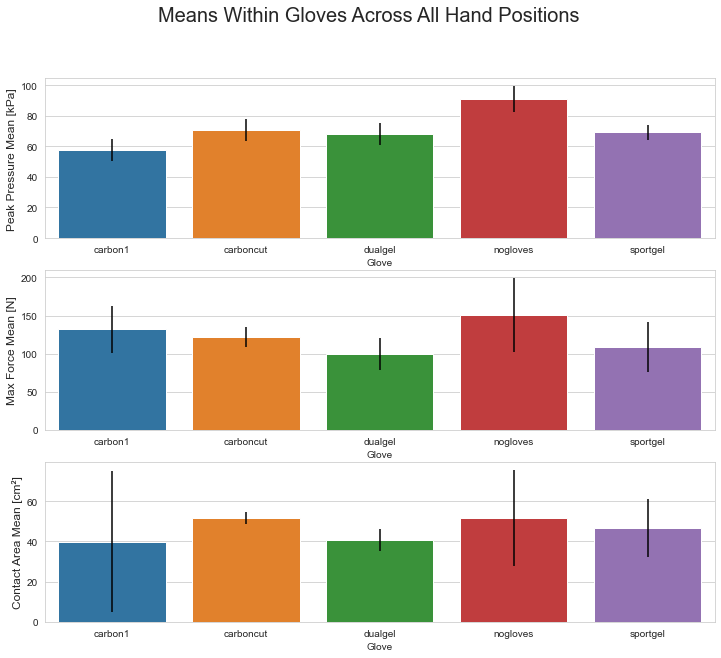

In [56]:
#graph average of all hand positions for each glove

plt.show()
fig, axs = plt.subplots(3,1,figsize = (12, 10))
fig.suptitle('Means Within Gloves Across All Hand Positions',fontsize = 20)

axs[0] = sns.barplot(x= 'Glove',y = 'Peak Pressure Mean [kPa]',data = gloves, ax = axs[0], yerr = gloves['Peak Pressure std [kPa]'])
axs[0].set_ylabel('Peak Pressure Mean [kPa]', fontsize = 12)
axs[1] = sns.barplot(x= 'Glove',y = 'Max Force Mean [N]',data = gloves, ax = axs[1], yerr = gloves['Max Force std [N]'])
axs[1].set_ylabel('Max Force Mean [N]', fontsize = 12)
axs[2] = sns.barplot(x= 'Glove',y = 'Contact area [cm\u00b2] Mean',data = gloves, ax = axs[2], yerr = gloves['Contact area [cm\u00b2] std '])
axs[2].set_ylabel('Contact Area Mean [cm\u00b2]', fontsize = 12)

In [16]:
#Create new dataframe averaging all glove conditions for a given hand position

hands = gb.groupby(gb['Hand'].str.lower()).mean()
hands
hands.reset_index(inplace = True)

In [17]:
hands

Hand  Peak Pressure Mean [kPa]  Peak Pressure std [kPa]  \
0        drops                 85.250000                 6.328245   
1        hoods                 59.250000                 4.829326   
2  hoods brake                 76.416667                 3.052224   
3         tops                 64.000000                13.663125   

   Max Force Mean [N]  Max Force std [N]  Contact area [cm²] Mean  \
0          128.164667          32.139615                46.066333   
1          114.007667          23.944345                47.594667   
2          137.155667          31.370236                48.545667   
3          111.822667          29.794947                42.156000   

   Contact area [cm²] std   
0                15.972540  
1                17.045748  
2                17.254034  
3                15.501555

Text(0, 0.5, 'Contact Area Mean [cm²]')

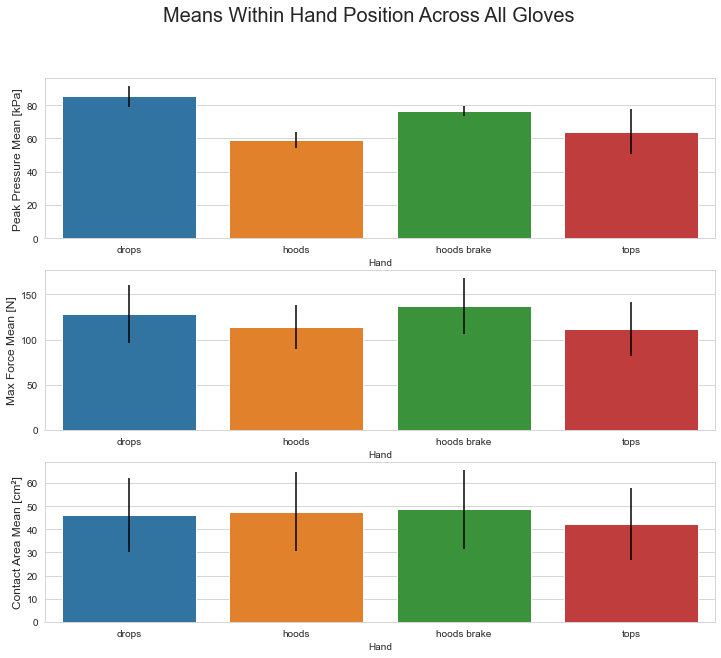

In [55]:
# Graph the average of all gloves within a given hand position
plt.show()
fig, axs = plt.subplots(3,1,figsize = (12, 10))
fig.suptitle('Means Within Hand Position Across All Gloves',fontsize = 20)

axs[0] = sns.barplot(x= 'Hand',y = 'Peak Pressure Mean [kPa]',data = hands, ax = axs[0], yerr = hands['Peak Pressure std [kPa]'])
axs[0].set_ylabel('Peak Pressure Mean [kPa]', fontsize = 12)
axs[1] = sns.barplot(x= 'Hand',y = 'Max Force Mean [N]',data = hands, ax = axs[1],yerr = hands['Max Force std [N]'])
axs[1].set_ylabel('Max Force Mean [N]', fontsize = 12)
axs[2] = sns.barplot(x= 'Hand',y = 'Contact area [cm\u00b2] Mean',data = hands, ax = axs[2], yerr = hands['Contact area [cm\u00b2] std '])
axs[2].set_ylabel('Contact Area Mean [cm\u00b2]', fontsize = 12)


In [29]:
#Create dataframes for each handpositon, but leaving each glove condition separate

df_tops = gb[gb['Hand'] == 'tops']
df_drops = gb[gb['Hand'] == 'drops']
df_hoods = gb[gb['Hand'] == 'hoods']
df_hoodsbrake = gb[gb['Hand'] == 'hoods brake']

File comment  Peak Pressure Mean [kPa]  Peak Pressure std [kPa]  \
3     carbon1 tops                     57.50                11.456439   
7   carboncut tops                     58.75                 1.767767   
11    dualgel tops                     63.75                22.980970   
15   nogloves tops                     87.50                21.213203   
19   sportgel tops                     52.50                10.897247   

    Max Force Mean [N]  Max Force std [N]  Contact area [cm²] Mean  \
3           132.123333          30.774919                    38.15   
7           102.485000           6.342748                    46.74   
11           97.135000          31.982440                    35.51   
15          148.230000          51.873353                    56.24   
19           79.140000          28.001273                    34.14   

    Contact area [cm²] std       Glove  Hand  
3                 33.449477    carbon1  tops  
7                  0.169706  carboncut  tops  
11                 3.662813    dualgel  tops  
15                26.092240   nogloves  tops  
19                14.133538   sportgel  tops

Text(0, 0.5, 'Contact Area Mean [cm²]')

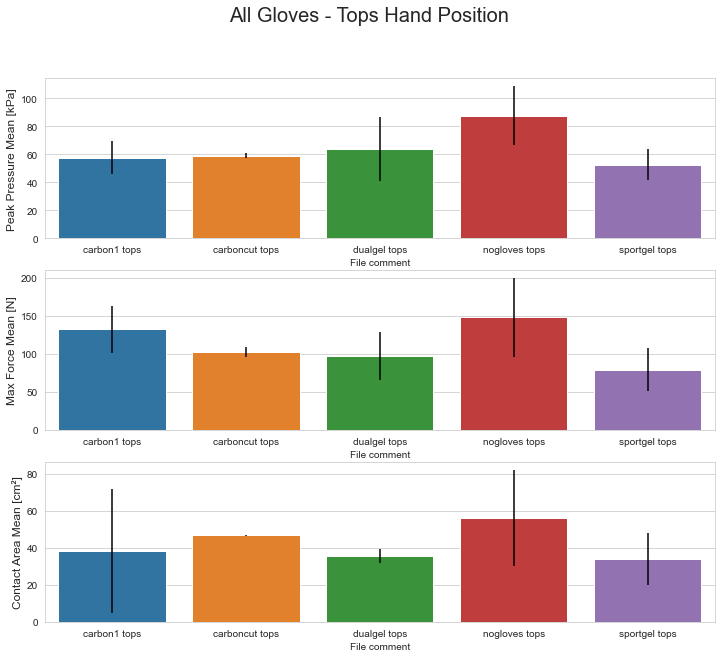

In [51]:
#Plot Data for Tops only hand positions, all gloves tested

plt.show()
fig, axs = plt.subplots(3,1,figsize = (12, 10))
fig.suptitle('All Gloves - Tops Hand Position',fontsize = 20)

axs[0] = sns.barplot(x= 'File comment',y = 'Peak Pressure Mean [kPa]',data = df_tops, ax = axs[0], yerr = df_tops['Peak Pressure std [kPa]'])
axs[0].set_ylabel('Peak Pressure Mean [kPa]', fontsize = 12)
axs[1] = sns.barplot(x= 'File comment',y = 'Max Force Mean [N]',data = df_tops, ax = axs[1],yerr = df_tops['Max Force std [N]'])
axs[1].set_ylabel('Max Force Mean [N]', fontsize = 12)
axs[2] = sns.barplot(x= 'File comment',y = 'Contact area [cm\u00b2] Mean',data = df_tops, ax = axs[2], yerr = df_tops['Contact area [cm\u00b2] std '])
axs[2].set_ylabel('Contact Area Mean [cm\u00b2]', fontsize = 12)

Text(0, 0.5, 'Contact Area Mean [cm²]')

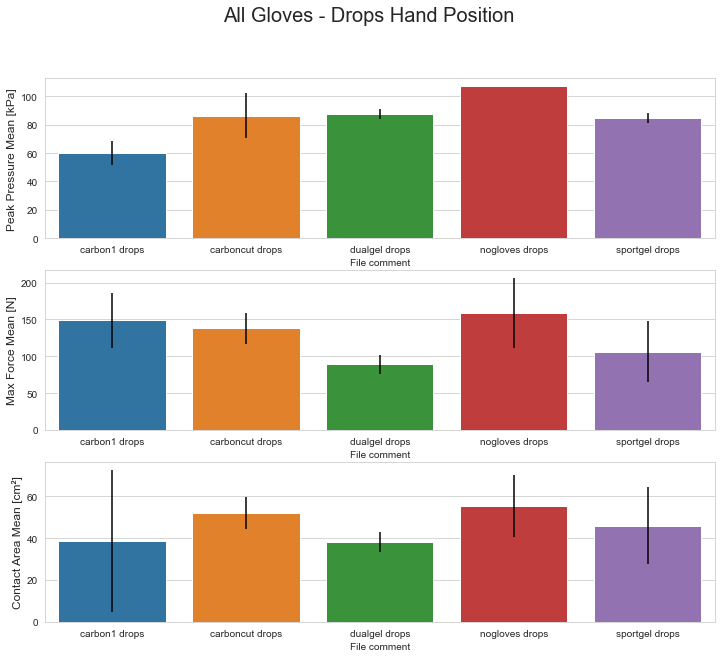

In [52]:
#Plot Data for Drops only hand positions, all gloves tested

plt.show()
fig, axs = plt.subplots(3,1,figsize = (12, 10))
fig.suptitle('All Gloves - Drops Hand Position',fontsize = 20)

axs[0] = sns.barplot(x= 'File comment',y = 'Peak Pressure Mean [kPa]',data = df_drops, ax = axs[0], yerr = df_drops['Peak Pressure std [kPa]'])
axs[0].set_ylabel('Peak Pressure Mean [kPa]', fontsize = 12)
axs[1] = sns.barplot(x= 'File comment',y = 'Max Force Mean [N]',data = df_drops, ax = axs[1],yerr = df_drops['Max Force std [N]'])
axs[1].set_ylabel('Max Force Mean [N]', fontsize = 12)
axs[2] = sns.barplot(x= 'File comment',y = 'Contact area [cm\u00b2] Mean',data = df_drops, ax = axs[2], yerr = df_drops['Contact area [cm\u00b2] std '])
axs[2].set_ylabel('Contact Area Mean [cm\u00b2]', fontsize = 12)

Text(0, 0.5, 'Contact Area Mean [cm²]')

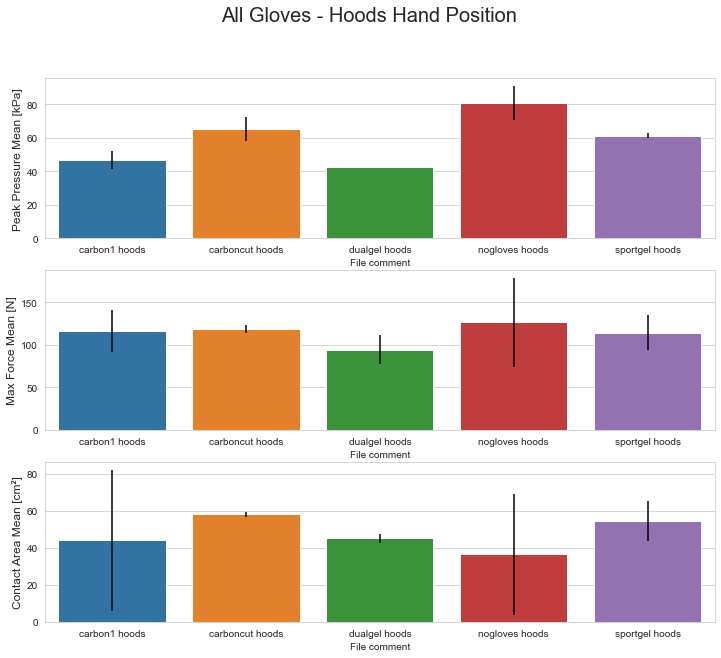

In [53]:
#Plot Data for hoods only hand positions, all gloves tested

plt.show()
fig, axs = plt.subplots(3,1,figsize = (12, 10))
fig.suptitle('All Gloves - Hoods Hand Position',fontsize = 20)

axs[0] = sns.barplot(x= 'File comment',y = 'Peak Pressure Mean [kPa]',data = df_hoods, ax = axs[0], yerr = df_hoods['Peak Pressure std [kPa]'])
axs[0].set_ylabel('Peak Pressure Mean [kPa]', fontsize = 12)
axs[1] = sns.barplot(x= 'File comment',y = 'Max Force Mean [N]',data = df_hoods, ax = axs[1],yerr = df_hoods['Max Force std [N]'])
axs[1].set_ylabel('Max Force Mean [N]', fontsize = 12)
axs[2] = sns.barplot(x= 'File comment',y = 'Contact area [cm\u00b2] Mean',data = df_hoods, ax = axs[2], yerr = df_hoods['Contact area [cm\u00b2] std '])
axs[2].set_ylabel('Contact Area Mean [cm\u00b2]', fontsize = 12)

Text(0, 0.5, 'Contact Area Mean [cm²]')

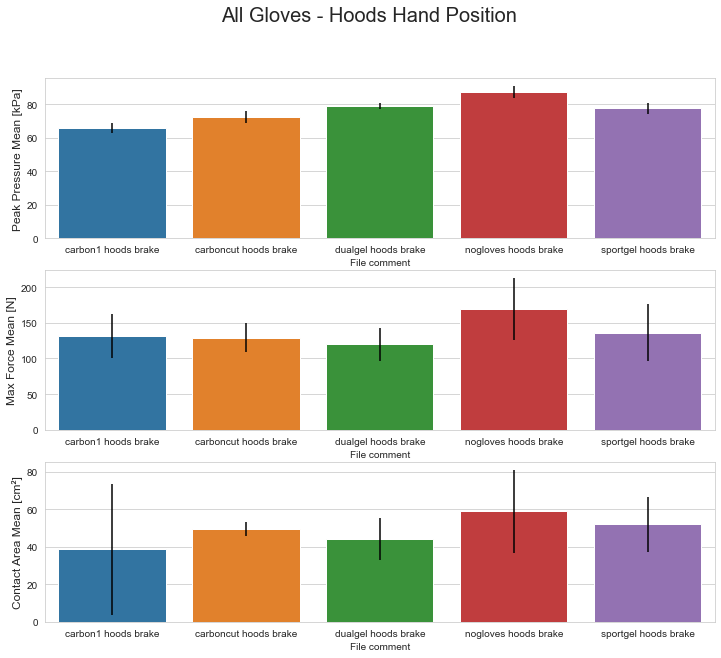

In [54]:
#Plot Data for hoods brake only hand positions, all gloves tested

plt.show()
fig, axs = plt.subplots(3,1,figsize = (12, 10))
fig.suptitle('All Gloves - Hoods Hand Position',fontsize = 20)

axs[0] = sns.barplot(x= 'File comment',y = 'Peak Pressure Mean [kPa]',data = df_hoodsbrake, ax = axs[0], yerr = df_hoodsbrake['Peak Pressure std [kPa]'])
axs[0].set_ylabel('Peak Pressure Mean [kPa]', fontsize = 12)
axs[1] = sns.barplot(x= 'File comment',y = 'Max Force Mean [N]',data = df_hoodsbrake, ax = axs[1],yerr = df_hoodsbrake['Max Force std [N]'])
axs[1].set_ylabel('Max Force Mean [N]', fontsize = 12)
axs[2] = sns.barplot(x= 'File comment',y = 'Contact area [cm\u00b2] Mean',data = df_hoodsbrake, ax = axs[2], yerr = df_hoodsbrake['Contact area [cm\u00b2] std '])
axs[2].set_ylabel('Contact Area Mean [cm\u00b2]', fontsize = 12)

In [ ]:
#Normalize data to %BW based off of average peak pressure and contact area.
#gb['Average Force (N)'] = (gb['Peak Pressure Mean [kPa]']*1000)*(gb['Contact area [cm\u00b2] Mean']*0.0001)
#sbj_mass = int(input("What is the subject's mass in kg?"))
#sbj_Newton = sbj_mass * 9.81
#gb['% Body Mass'] = (gb['Average Force (N)']/sbj_Newton) * 100